<a href="https://colab.research.google.com/github/qagustina/mentoria-churnprediction/blob/master/Grupo2_Mentor%C3%ADaChurn_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2022 - Mentoría "Churn Prediction: ¿Cómo retengo a mis clientes? Machine Learning aplicado a un caso de negocio"

---
**Trabajo Práctico Nº4 - Aprendizaje No Supervisado**

**Integrantes Grupo 2**

*   Natalia Grasselli
*   Rodrigo Pizarro
*   Agustina Quirós
*   Natalia Tassin

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)  # no usar notacion "e"
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

## 1. Preparación de los datos para aplicar modelos de clústering.

Evaluación visual e intuitiva de a dos variables por vez: 

Realizar visualizaciones de cómo se comportan las variables presentes en el dataset mediante el gráfico “pairplot”.

a. ¿Es posible en alguna de ellas visualizar “grupos” separados? ¿Qué variables presentan dicha separación?

b. ¿Se puede visualizar algún impacto de la variable target (Churn) en los posibles grupos?

c. Si evalúa que es necesario, seleccione sólo algunas variables con las cuales se realizarán modelos de clústering.

### df Original

En este entregable continuaremos trabajando sobre el dataset final del TP2. Primero, empezaremos trabajando con los datos curados tal y como estaban al finalizar el primer práctico.

In [2]:
#Importamos el df del TP2
df_churn_clean = pd.read_csv(
    'https://media.githubusercontent.com/media/qagustina/mentoria-churnprediction/master/df_churn_clean.csv')

Como queremos trabajar con información a nivel usuario, vamos a dropear las instancias que repiten el numero de usuario. 

In [3]:
df_churn_single = df_churn_clean.drop_duplicates(subset='userId', keep='first', inplace=False, ignore_index = True)

Sacamos las columnas de identificación del usuario, las columnas de sessión, de tiempo y las que habíamos armado de PCA

In [4]:
#Guardamos la info de userId y si es churn:

df_user = df_churn_single['userId']
df_target = df_churn_single['churn_user']

In [5]:
#Seleccionamos las columnas
non_interesting_cols = ['userId','churn_user','sessionId','ts','registration','PC 1','PC 2','PC 3','PC 4']

df_churn = df_churn_single.drop(non_interesting_cols, axis = 1, inplace=False) 

In [6]:
df_churn[:5]

,songsCountByUser,SongCountBySession,meanSessionLengthInSeconds,countSessionsByUser,BounceRate,AddsSeen,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,page_Help,page_Home,page_Logout,page_NextSong,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade,level_free,level_paid
0,1.103,-0.918,-0.310,1.532,-0.457,0.967,0.474,1.110,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950
1,0.214,-1.204,-0.838,0.077,0.329,-0.648,1.611,0.197,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950
2,-0.052,-0.408,-0.839,-0.375,-0.457,-0.758,-1.041,-0.073,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513
3,0.392,-0.240,0.258,-0.225,-0.457,-0.061,0.853,0.368,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513
4,1.562,-0.925,-0.356,0.428,-0.457,-0.758,1.989,1.510,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513


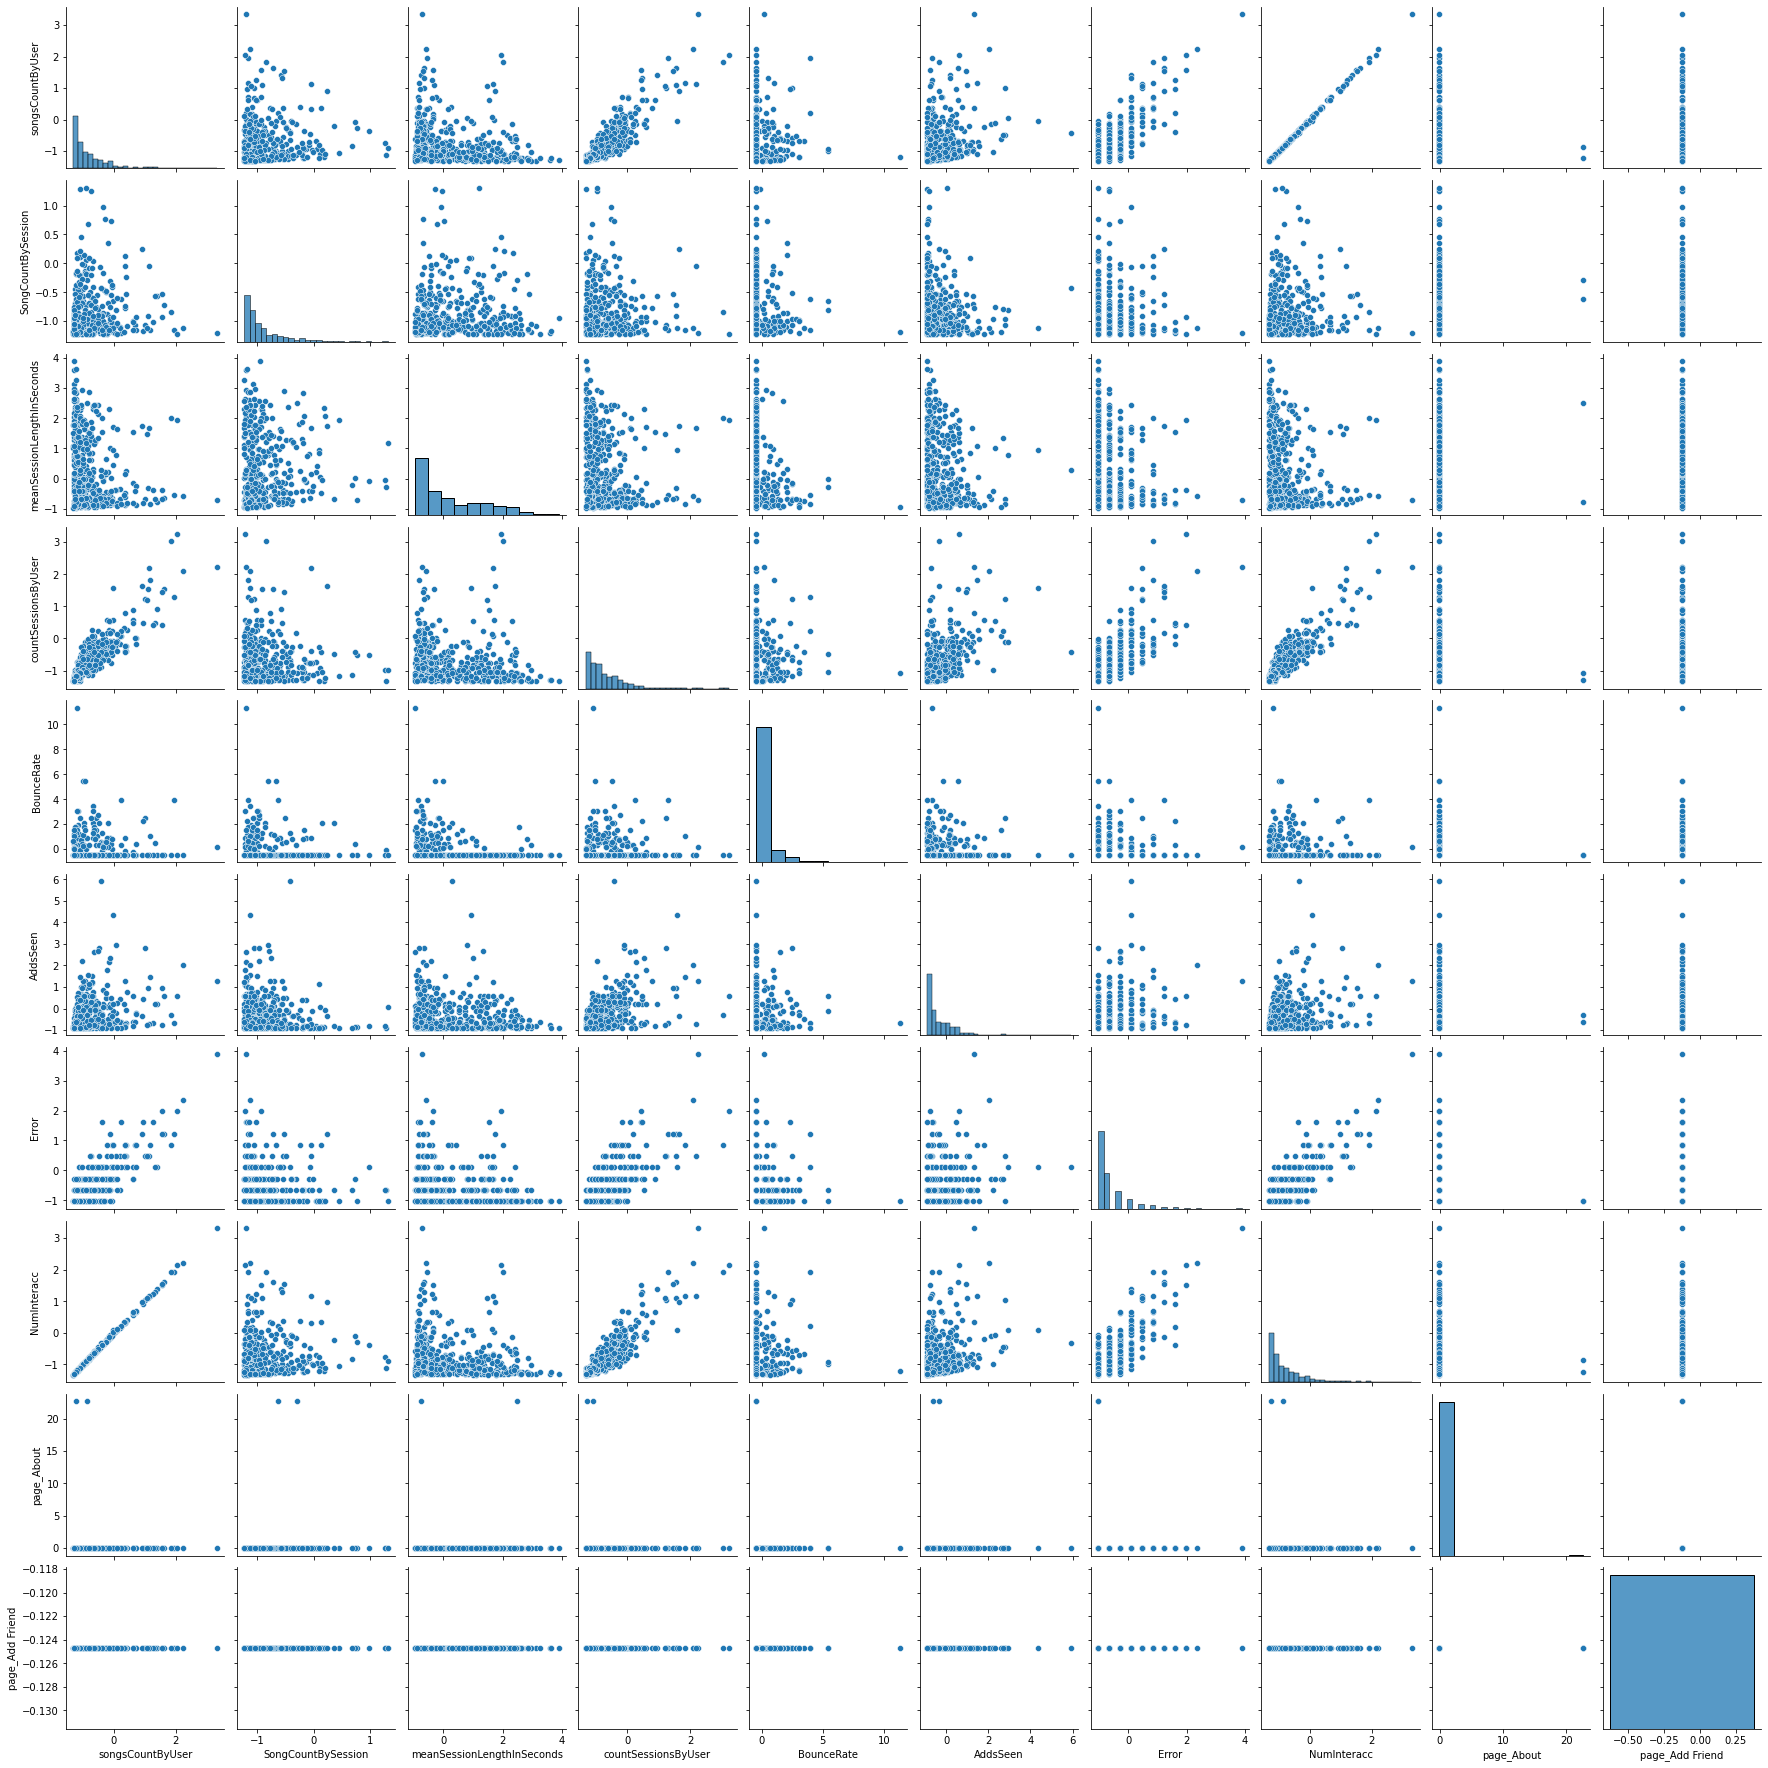

In [7]:
# visualizamos primeras 10 columnas
sns.pairplot(df_churn.iloc[:, 0:10])

Notamos que en un principio, no parecería haber clusters separados en base a dos variables. Vamos a ver, si aplicando PCA podemos encontrar grupos separados. 

### PCA



In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=20)
pca.fit(df_churn)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 0.00833994 -0.01650001 -0.00962057  0.01303206  0.01972307  0.00045635
   0.00358964  0.00834883 -0.02389329  0.          0.          0.
   0.          0.          0.         -0.00572665  0.89478301  0.
  -0.43080379 -0.         -0.         -0.         -0.         -0.
   0.          0.         -0.          0.0777553  -0.0777553 ]
 [-0.03332787 -0.03485829 -0.01790953 -0.01474245 -0.00826338  0.08013944
  -0.03299371 -0.0316184   0.85979832 -0.          0.         -0.
  -0.         -0.         -0.          0.01034255 -0.0690745  -0.
  -0.0667921   0.          0.         -0.          0.         -0.
  -0.         -0.         -0.          0.34638457 -0.34638457]
 [-0.1067852   0.09519614  0.27065216 -0.14963703 -0.10181524 -0.24400204
  -0.101771   -0.1097131   0.44886787 -0.          0.          0.
   0.          0.          0.         -0.01106218  0.07548102  0.
  -0.08602223 -0.         -0.          0.         -0.          0.
   0.          0.          0.        

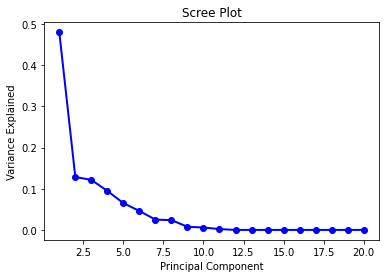

In [10]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Podemos ver que las 4 primeras componentes principales son suficiente para explicar el conjunto de datos

In [11]:
x_reduced = pca.transform(df_churn)

In [12]:
x_reduced = x_reduced[:,:4]

In [13]:
x_reduced

array([[-2.57093813,  0.32767234, -2.22942752,  2.80430103],
       [-2.57629085,  0.25369338, -1.78836041,  1.98474814],
       [-3.00784452, -1.37093526,  1.43483648,  1.66004388],
       ...,
       [-2.68036283,  0.38145089,  0.13703918, -2.38703492],
       [ 3.2343725 ,  0.19100164,  0.80077887, -2.32947459],
       [ 2.85930508, -1.50897639,  3.16286082, -0.73723246]])

In [14]:
df_pca = pd.DataFrame(x_reduced,columns=['pca1','pca2','pca3','pca4'])
df_pca

,pca1,pca2,pca3,pca4
0,-2.571,0.328,-2.229,2.804
1,-2.576,0.254,-1.788,1.985
2,-3.008,-1.371,1.435,1.660
3,-3.005,-1.434,1.266,2.438
4,-2.956,-1.577,0.742,4.146
...,...,...,...,...
443,-2.671,0.392,-0.133,-1.903
444,3.249,0.154,0.575,-1.684
445,-2.680,0.381,0.137,-2.387
446,3.234,0.191,0.801,-2.329


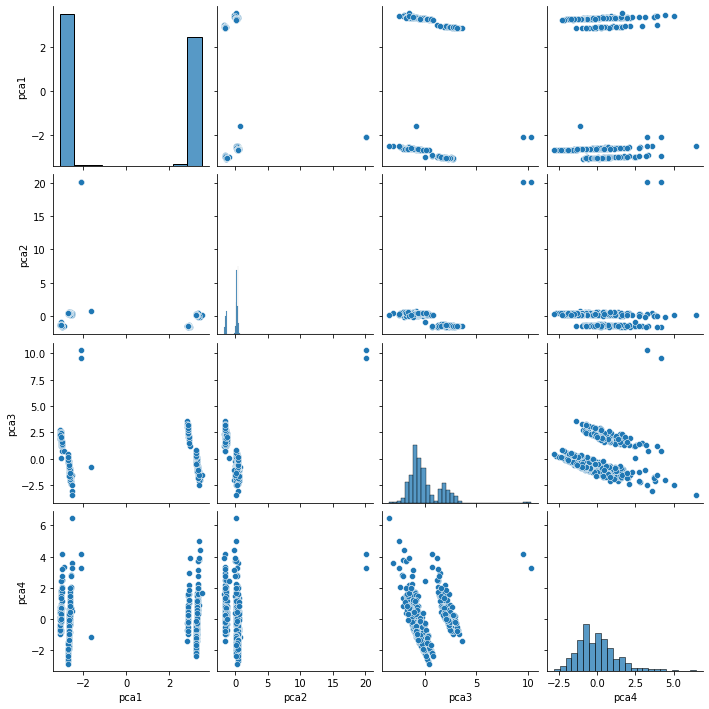

In [15]:
# con PCA se puede visualizar mejor comparando con las variables de df_churn
sns.pairplot(df_pca)

Observamos que ahora sí, aparecen grupos separados, que podrían estar marcando diferentes clusters. Vamos, entonces, a trabajar con las componentes principales; en vez del df original. 

Si agregamos la columna churn, podemos evaluar si esta variable tiene o no alguna relación con los distintos grupos visualizados. 

In [16]:
df_pca_full = df_pca.copy()
df_pca_full['churn'] = df_target
df_pca_full['user'] = df_user

In [17]:
import plotly.express as px
fig = px.scatter(x=df_pca_full['pca1'], y=df_pca_full['pca2'], 
                  color = df_pca_full['churn'],
                  title='PCA 1 vs PCA 2')

fig.show(renderer="colab")

In [19]:

fig = px.scatter(x=df_pca_full['pca1'], y=df_pca_full['pca3'], 
                  color = df_pca_full['churn'],
                  title='PCA 1 vs PCA 3')

fig.show(renderer="colab")

In [18]:

fig = px.scatter(x=df_pca_full['pca1'], y=df_pca_full['pca4'], 
                  color = df_pca_full['churn'],
                  title='PCA 1 vs PCA 4')

fig.show(renderer="colab")

In [20]:

fig = px.scatter(x=df_pca_full['pca2'], y=df_pca_full['pca3'], 
                  color = df_pca_full['churn'],
                  title='PCA 2 vs PCA 3')

fig.show(renderer="colab")

In [21]:

fig = px.scatter(x=df_pca_full['pca2'], y=df_pca_full['pca4'], 
                  color = df_pca_full['churn'],
                  title='PCA 2 vs PCA 4')

fig.show(renderer="colab")

In [22]:

fig = px.scatter(x=df_pca_full['pca3'], y=df_pca_full['pca4'], 
                  color = df_pca_full['churn'],
                  title='PCA 3 vs PCA 4')

fig.show(renderer="colab")

En un principio, los usuarios churn y no churn se encuentran mezclados entre los grupos.

## 2. Creación de modelos de clustering: K-means

a. Buscamos el número de clusters óptimo observando la inercia de cada uno.

b. Correr K-means utilizando como parámetro el número de clusters obtenido en
el punto anterior.

c. Analizar la cantidad de casos en cada clúster.

d. Grafique de a dos variables incluyendo el label obtenido en el clustering. 

¿Es posible determinar alguna separación de grupos?

Documentación:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### a. Buscamos el número de clusters óptimo observando la inercia de cada uno.



In [23]:
from sklearn.cluster import KMeans,MeanShift

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

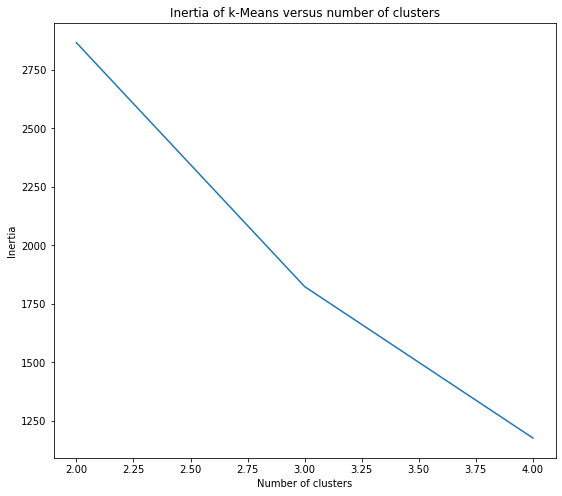

In [24]:
scores = [KMeans(n_clusters=i).fit(df_pca).inertia_ for i in range(2,5)]

plt.figure(figsize=(9,8))
plt.plot(np.arange(2, 5), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

El numero óptimo de clusters es 3

### b. Correr K-means utilizando como parámetro el número de clusters obtenido en el punto anterior.



In [25]:
# Número de clusters elegido
n_clust = 3  

km = KMeans(n_clusters=n_clust,random_state=4)
km.fit(df_pca) # Utiliza todas las variables

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  1823.3755586534237


In [26]:
df_clusters=df_pca.copy()

In [27]:
df_clusters['kmeans_3'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.sample(10)

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


,pca1,pca2,pca3,pca4,kmeans_3
215,3.275,0.239,-0.284,-0.593,1
124,-2.975,-1.425,1.316,2.058,0
177,-2.634,0.413,-1.023,-0.345,0
277,-2.643,0.472,-0.978,-0.735,0
417,-2.103,20.085,10.301,3.292,2
84,3.304,0.135,-0.665,0.810,1
318,-2.651,0.412,-0.753,-0.702,0
88,3.302,0.227,-0.877,0.806,1
151,-2.625,0.464,-1.428,0.331,0
40,-2.618,0.663,-2.078,0.845,0


In [28]:
df_clusters['kmeans_3'].unique()

array([0, 1, 2], dtype=int32)

### c. Analizar la cantidad de casos en cada clúster.


In [29]:
df_clusters.groupby('kmeans_3').count()

,pca1,pca2,pca3,pca4
kmeans_3,,,,
0,240,240,240,240
1,206,206,206,206
2,2,2,2,2


Tenemos así que: 
* el cluster 0 tiene 240 casos
* el cluster 1 tiene 206 casos
* el cluster 2 tiene 2 casos

### d. Grafique de a dos variables incluyendo el label obtenido en el clustering.

#### Con PCA

In [30]:
fig = px.scatter(x=df_clusters['pca1'], y=df_clusters['pca2'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 1 vs PCA 2')

fig.show(renderer="colab")

In [31]:
fig = px.scatter(x=df_clusters['pca1'], y=df_clusters['pca3'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 1 vs PCA 3')

fig.show(renderer="colab")

In [32]:
fig = px.scatter(x=df_clusters['pca1'], y=df_clusters['pca4'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 1 vs PCA 4')

fig.show(renderer="colab")

In [33]:
fig = px.scatter(x=df_clusters['pca2'], y=df_clusters['pca3'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 2 vs PCA 3')

fig.show(renderer="colab")

In [34]:
fig = px.scatter(x=df_clusters['pca2'], y=df_clusters['pca4'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 2 vs PCA 4')

fig.show(renderer="colab")

In [35]:
fig = px.scatter(x=df_clusters['pca3'], y=df_clusters['pca4'], 
                  color = df_clusters['kmeans_3'],
                  title='PCA 3 vs PCA 4')

fig.show(renderer="colab")

#### Con variables originales

In [36]:
#agregamos la columna de clusters al df original
df_churn_clusters = df_churn.copy()
df_churn_clusters['kmeans'] = df_clusters['kmeans_3']
df_churn_clusters['user'] = df_user
df_churn_clusters['churn'] = df_target

In [37]:
df_churn_clusters[:3]

,songsCountByUser,SongCountBySession,meanSessionLengthInSeconds,countSessionsByUser,BounceRate,AddsSeen,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,page_Help,page_Home,page_Logout,page_NextSong,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade,level_free,level_paid,kmeans,user,churn
0,1.103,-0.918,-0.310,1.532,-0.457,0.967,0.474,1.110,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,293.000,1.000
1,0.214,-1.204,-0.838,0.077,0.329,-0.648,1.611,0.197,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,98.000,0.000
2,-0.052,-0.408,-0.839,-0.375,-0.457,-0.758,-1.041,-0.073,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,0,179.000,0.000


In [38]:
df_churn_clusters.columns

Index(['songsCountByUser', 'SongCountBySession', 'meanSessionLengthInSeconds',
       'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc',
       'page_About', 'page_Add Friend', 'page_Add to Playlist', 'page_Cancel',
       'page_Cancellation Confirmation', 'page_Downgrade', 'page_Error',
       'page_Help', 'page_Home', 'page_Logout', 'page_NextSong',
       'page_Roll Advert', 'page_Save Settings', 'page_Settings',
       'page_Submit Downgrade', 'page_Submit Upgrade', 'page_Thumbs Down',
       'page_Thumbs Up', 'page_Upgrade', 'level_free', 'level_paid', 'kmeans',
       'user', 'churn'],
      dtype='object')

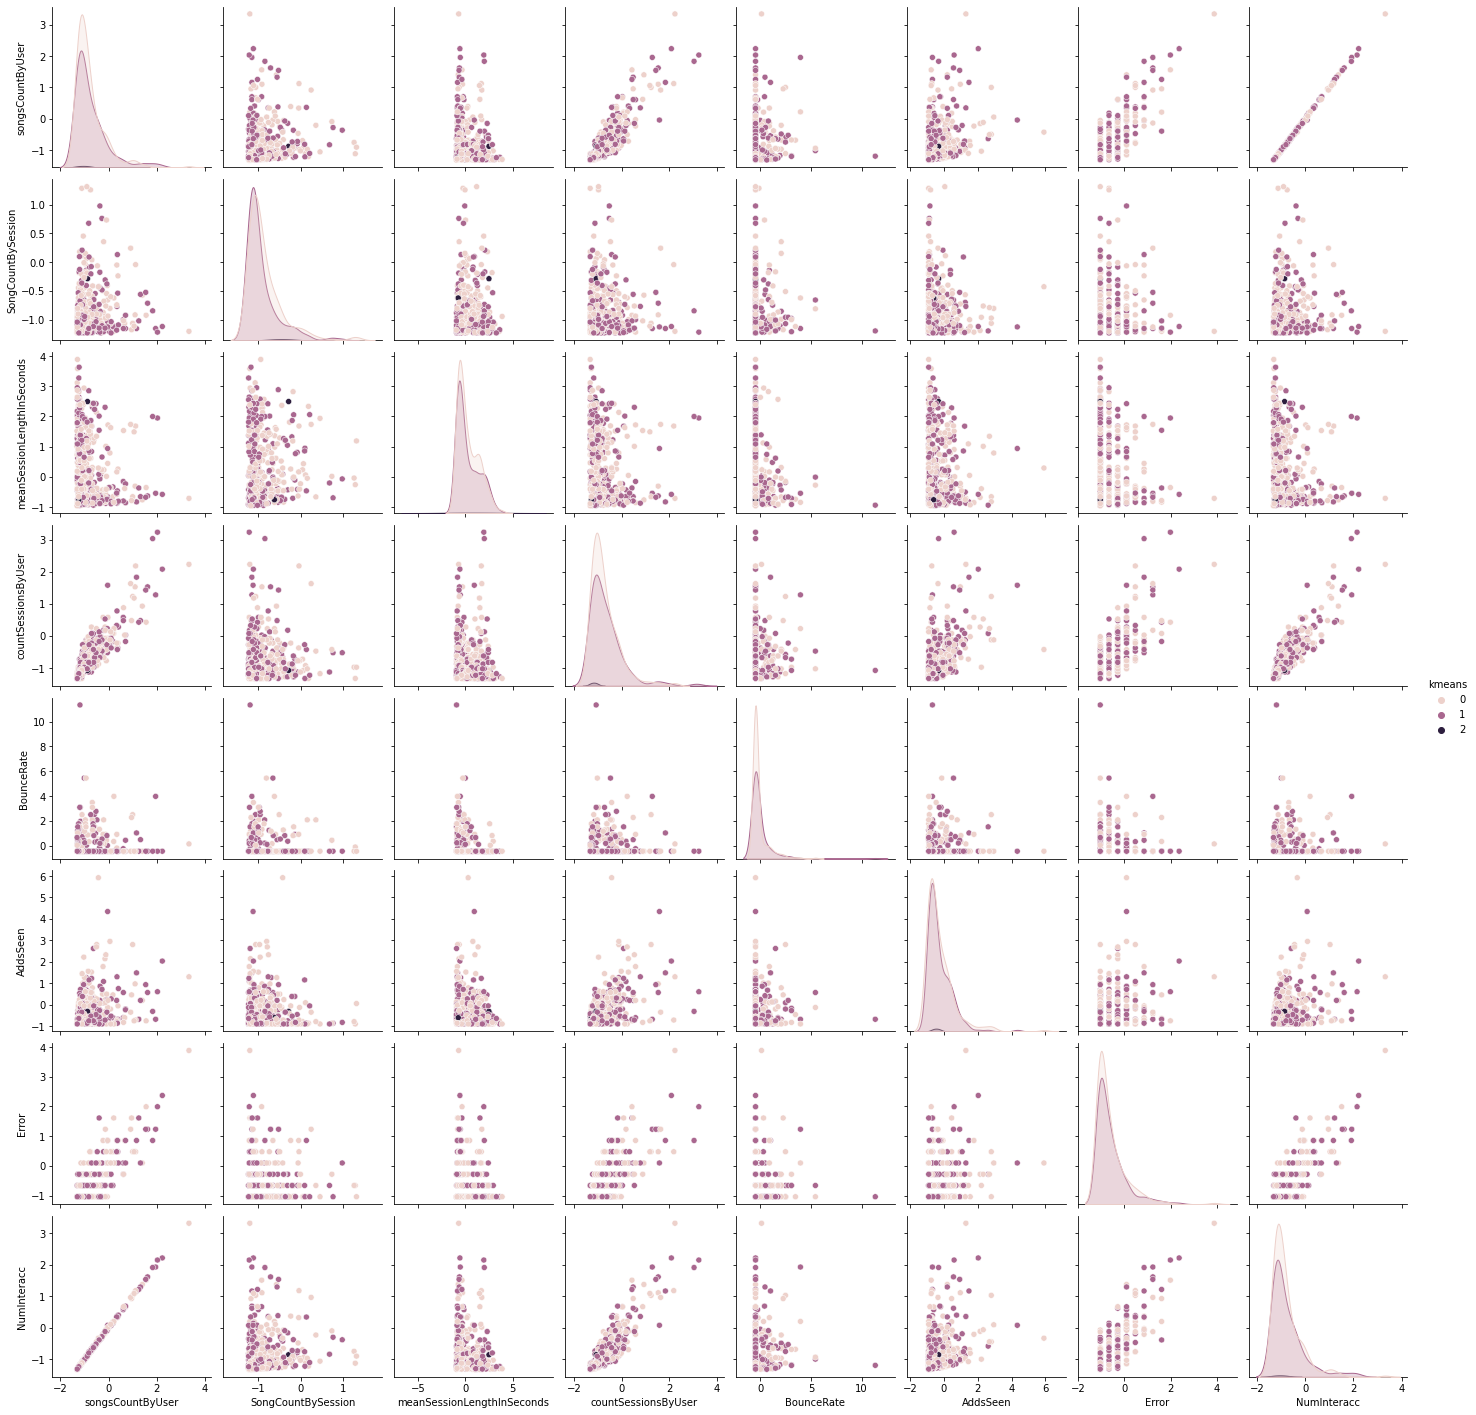

In [39]:
# visualizamos primeras 8 columnas
sns.pairplot(df_churn_clusters,
              x_vars=['songsCountByUser', 'SongCountBySession', 'meanSessionLengthInSeconds',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc'],
              y_vars=['songsCountByUser', 'SongCountBySession', 'meanSessionLengthInSeconds',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc'],
              hue = 'kmeans')

Sigue siendo dificil establecer alguna relación. 

## 3. Creación de modelos de clustering: Algoritmo Jerárquico

a. Realizar las aglomeraciones utilizando el algoritmo
“AgglomerativeClustering”.

b. Analizar la cantidad de casos en cada clúster.

e. Grafique de a dos variables incluyendo el label obtenido en el clustering. ¿Es posible determinar alguna separación de grupos?

f. Como conclusión ¿cuál algoritmo de clustering parece haber funcionado
mejor para el set de datos trabajado?

Documentación:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### a. Realizar las aglomeraciones utilizando el algoritmo
“AgglomerativeClustering”.

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
clusters = []

cluster_1 = {
    "title": "Dos clusters",
    "cluster": AgglomerativeClustering(n_clusters=2).fit(df_churn)
}
clusters.append(cluster_1)

cluster_2 = {
    "title": "Tres clusters",
    "cluster": AgglomerativeClustering(n_clusters=3).fit(df_churn)
}
clusters.append(cluster_2)

In [43]:
df_agglomerative = df_churn.copy()
for i in clusters:
    df_agglomerative[i["title"]] = i["cluster"].labels_

In [44]:
df_agglomerative

,songsCountByUser,SongCountBySession,meanSessionLengthInSeconds,countSessionsByUser,BounceRate,AddsSeen,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,page_Help,page_Home,page_Logout,page_NextSong,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade,level_free,level_paid,Dos clusters,Tres clusters
0,1.103,-0.918,-0.310,1.532,-0.457,0.967,0.474,1.110,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,0
1,0.214,-1.204,-0.838,0.077,0.329,-0.648,1.611,0.197,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,0
2,-0.052,-0.408,-0.839,-0.375,-0.457,-0.758,-1.041,-0.073,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,0,0
3,0.392,-0.240,0.258,-0.225,-0.457,-0.061,0.853,0.368,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,0,0
4,1.562,-0.925,-0.356,0.428,-0.457,-0.758,1.989,1.510,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,-1.190,-1.204,2.385,-1.178,-0.457,-0.575,-0.662,-1.187,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,0
444,-0.822,-1.155,2.851,-0.827,-0.457,-0.758,-1.041,-0.802,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,5.164,-0.107,-2.134,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,1,1
445,-1.299,-1.134,2.865,-1.228,-0.457,-0.832,-1.041,-1.308,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,0.469,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0,0
446,-1.237,-1.232,3.275,-1.178,-0.457,-0.648,-1.041,-1.240,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,5.164,-0.107,-2.134,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,1,1


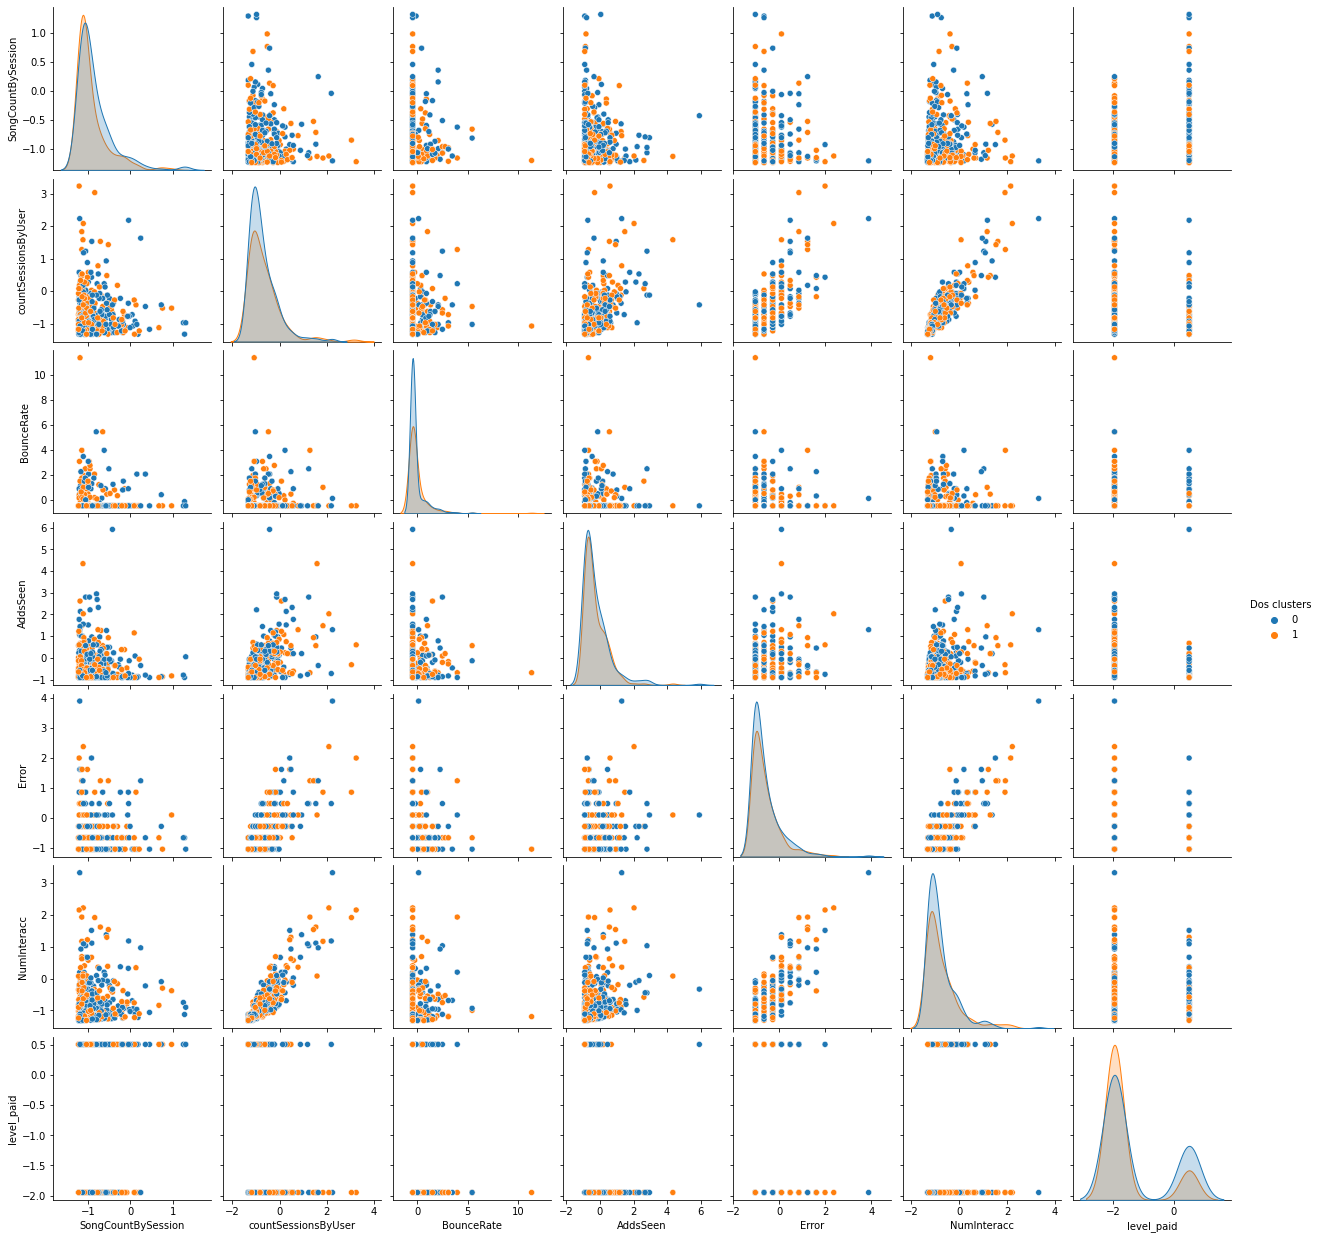

In [45]:
# Se grafíca con 2 clusters

sns.pairplot(df_agglomerative,
              x_vars=['SongCountBySession',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc', 'level_paid'],
              y_vars=['SongCountBySession',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc', 'level_paid'],
              hue = 'Dos clusters')

### b. Analizar la cantidad de casos en cada clúster.

Se ve que ambas clases están bien distribuidas, pero no se logra identificar si hay algún parámetro que determina el cluster

### e. Grafique de a dos variables incluyendo el label obtenido en el clustering. ¿Es posible determinar alguna separación de grupos?

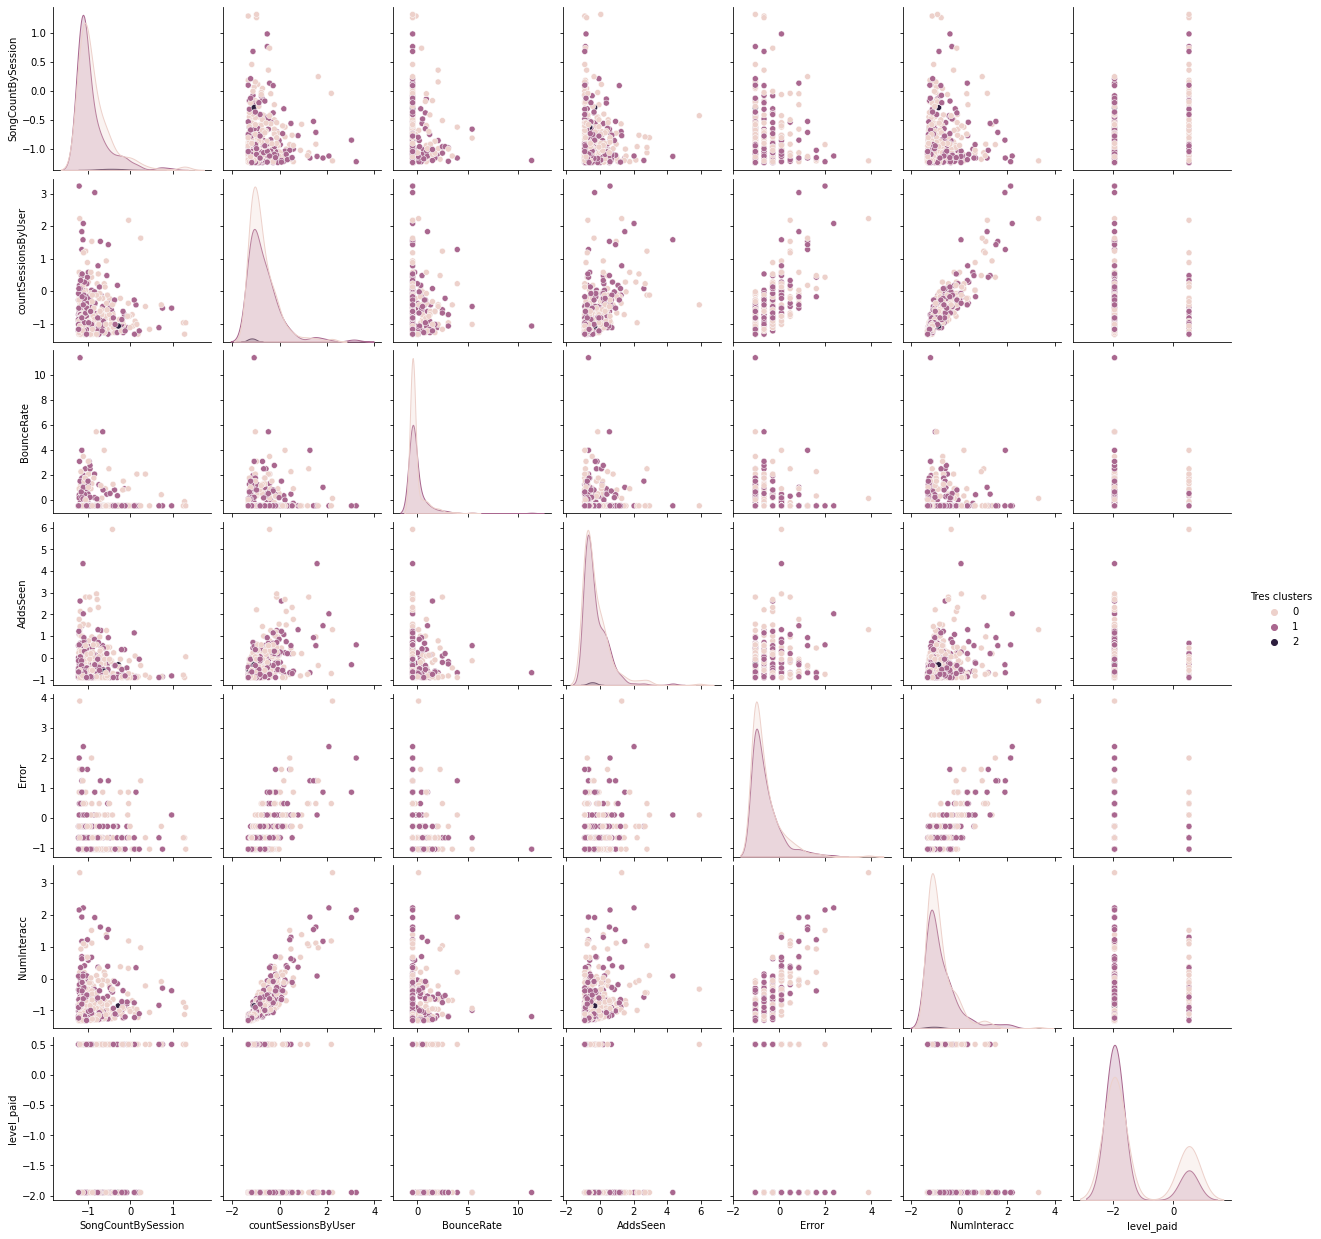

In [46]:
# Se grafíca con 3 clusters

sns.pairplot(df_agglomerative,
              x_vars=['SongCountBySession',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc', 'level_paid'],
              y_vars=['SongCountBySession',
                      'countSessionsByUser', 'BounceRate', 'AddsSeen', 'Error', 'NumInteracc', 'level_paid'],
              hue = 'Tres clusters')

Con 3 clusters se puede ver que el algoritmo detecta dos muy claramente y el tercero tiene muy pocas muestras comparado a los otros dos.

### f. Como conclusión ¿cuál algoritmo de clustering parece haber funcionado mejor para el set de datos trabajado?

Hasta acá hemos analizado los distintos algoritmos de clustering con el dataset original y con las Componentes Principales.
Podemos observar que con el análisis de las componentes principales pareciera que se arman 2 clusters distintos, sin embargo al ser una combinación lineal de las variables se complejiza la interpretabilidad de las mismas. Analizando el dataset original también logramos distinguir grupos distintos sin embargo se encuentran muy solapados.


